In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import numpy as np

# Confirm both GPUs are available
gpus = tf.config.list_physical_devices('GPU')
print("GPUs Available:", gpus)

# Enable memory growth (optional)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Create mirrored strategy to use multiple GPUs
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas in sync:", strategy.num_replicas_in_sync)

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Number of replicas in sync: 2


In [2]:
!pip install ultralytics

In [3]:
!pip install Roboflow

In [4]:
from ultralytics import YOLO
from roboflow import Roboflow
import matplotlib.pyplot as plt

In [7]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolo12m.pt')  # Ensure this weight file exists

# Train the model
model.train(data='/kaggle/input/pk-lot-yolov-12/data.yaml', epochs=10, batch=10,device=2)


Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:2 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12m.pt, data=/kaggle/input/pk-lot-yolov-12/data.yaml, epochs=10, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=2, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /kaggle/input/pk-lot-yolov-12/train/labels... 11574 images, 248 backgrounds, 0 corrupt: 100%|██████████| 11574/11574 [00:15<00:00, 758.25it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/pk-lot-yolov-12/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/pk-lot-yolov-12/valid/labels... 2186 images, 45 backgrounds, 0 corrupt: 100%|██████████| 2186/2186 [00:03<00:00, 653.16it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/pk-lot-yolov-12/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 123 weight(decay=0.0), 130 weight(decay=0.00046875), 129 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9668     0.5773      1.026        254        640: 100%|██████████| 1158/1158 [11:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.08it/s]


                   all       2186     126260      0.964      0.975      0.989      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.6514     0.4013     0.8876        261        640: 100%|██████████| 1158/1158 [11:10<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:53<00:00,  2.07it/s]


                   all       2186     126260      0.963      0.977       0.99      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.5581     0.3543     0.8571        297        640: 100%|██████████| 1158/1158 [11:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.09it/s]


                   all       2186     126260      0.975      0.973      0.992      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      0.513      0.331     0.8426        179        640: 100%|██████████| 1158/1158 [11:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.09it/s]


                   all       2186     126260      0.977      0.961      0.992      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.4538     0.3016      0.826        266        640: 100%|██████████| 1158/1158 [11:03<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.10it/s]


                   all       2186     126260      0.982      0.982      0.994      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.4272     0.2806     0.8181        184        640: 100%|██████████| 1158/1158 [11:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.10it/s]


                   all       2186     126260       0.99      0.977      0.994      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.3828     0.2496     0.8065        136        640: 100%|██████████| 1158/1158 [11:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.10it/s]


                   all       2186     126260      0.997      0.997      0.994      0.959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.3547     0.2242     0.7996        330        640: 100%|██████████| 1158/1158 [11:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.09it/s]


                   all       2186     126260      0.998      0.998      0.994      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.3203     0.1998     0.7925        259        640: 100%|██████████| 1158/1158 [11:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:53<00:00,  2.06it/s]


                   all       2186     126260      0.997      0.997      0.994      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.2778     0.1757     0.7849        166        640: 100%|██████████| 1158/1158 [11:03<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [00:52<00:00,  2.10it/s]


                   all       2186     126260      0.999      0.998      0.994       0.98

10 epochs completed in 2.003 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 40.8MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:2 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 169 layers, 20,106,454 parameters, 0 gradients, 67.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [01:17<00:00,  1.42it/s]


                   all       2186     126260      0.999      0.998      0.994       0.98
           space-empty       1838      67329      0.999      0.997      0.995      0.981
        space-occupied       1702      58931      0.998      0.999      0.994      0.978


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd96bfd4e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
best_model = YOLO('/kaggle/working/runs/detect/train6/weights/last.pt')

In [10]:
results = best_model(['/kaggle/input/pk-lot-yolov-12/test/images/2012-09-15_12_27_15_jpg.rf.6948e8d37b27b15170cce1e1a924c6ce.jpg'])  # return a list of Results objects
result = results[0]


0: 640x640 58 space-emptys, 42 space-occupieds, 44.1ms
Speed: 1.9ms preprocess, 44.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


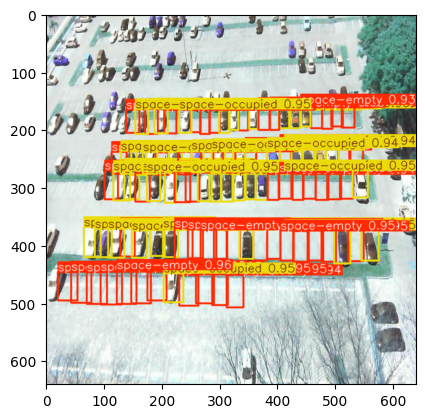

In [11]:
plt.imshow(result.plot())